# How to create a CC-U gate given CNOT and unary gates

We look for such $V$, that $V^2=U$. How?

For rotations this is easy: $Rot(2\alpha)=Rot^2(\alpha)$.

For reflections this can be a problem. Still, we have [Matrix square root](https://en.wikipedia.org/wiki/Square_root_of_a_matrix).

### How to?

Note, that if we apply $V$, and then we can branch into $V$ again, or $V^\dagger$. First path will bring us to $U$, whereas the second will cancel the operation, as $V^\dagger = V^{-1}$. So, using this idea we can build a $CCU$!

![](https://qiskit.org/textbook/ch-gates/images/iden2.png) [pic](https://qiskit.org/textbook/ch-gates/more-circuit-identities.html)

### Go ahead and practice!

Implement CCZ.

$CCZ$ matrix is:

In [2]:
import numpy as np
CCZ = np.eye(8)
CCZ[-1, -1] = -1
print(CCZ)

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.]]


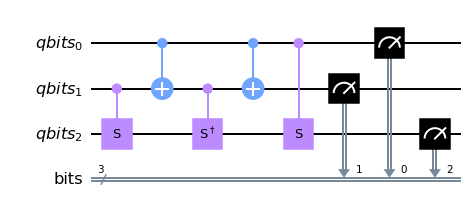

OPENQASM 2.0;
include "qelib1.inc";
gate cs q0,q1 { cp(pi/2) q0,q1; }
gate csdg q0,q1 { cp(-pi/2) q0,q1; }
qreg qbits[3];
creg bits[3];
cs qbits[1],qbits[2];
cx qbits[0],qbits[1];
csdg qbits[1],qbits[2];
cx qbits[0],qbits[1];
cs qbits[0],qbits[2];
measure qbits[0] -> bits[0];
measure qbits[1] -> bits[1];
measure qbits[2] -> bits[2];



In [26]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import matplotlib.pyplot as plt

qr = QuantumRegister(3, 'qbits')
cr = ClassicalRegister(3, 'bits')
qc = QuantumCircuit(qr, cr)


from qiskit.circuit.library.standard_gates import SGate

# this is a construction of random controlled gate
CS = SGate().control(1)

# this is how we can inverse
CSI = SGate().inverse().control(1)

qc.append(CS, qr[1:])
qc.cx(0, 1)
qc.append(CSI, qr[1:])
qc.cx(0, 1)
qc.append(CS, [qr[0], qr[2]])

qc.measure(qr, cr)
qc.draw(output='mpl')
plt.show()

print(qc.qasm())

To read -- CSDG - Cylindrical Surrounding Double-Gate